<a href="https://colab.research.google.com/github/VizHERE/AI--Shaksham-Internship/blob/main/AI_Saksham_capstone_project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upgrades pip, the Python package installer, to the latest version.
!pip install --upgrade pip

In [ ]:
#Installs TensorFlow, an open-source machine learning library.
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [ ]:
#Loads the MNIST dataset.
mnist = tf.keras.datasets.mnist

In [ ]:
#Splits the data into training and testing sets.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#Prints the shapes of the training and testing datasets to verify their dimensions.
print("train_images:",train_images.shape)
print("train_labels:",train_labels.shape)
print("test_images:",test_images.shape)
print("test_labels:",test_labels.shape)

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


5


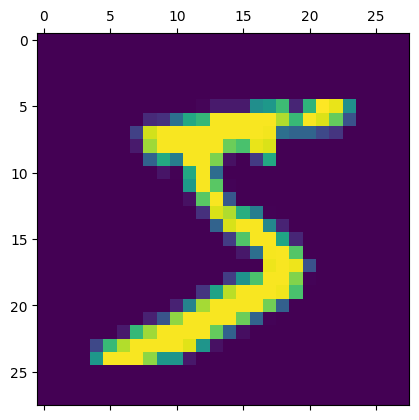

In [ ]:
# Displays the first training image.
plt.matshow(train_images[0])
#Prints the label of the first training image.
print(train_labels[0])

In [ ]:
#Normalizes the image pixel values to the range [0, 1].
train_images, test_images = train_images / 255.0, test_images /255.0

In [ ]:
#Reshapes the images to add a single color channel (grayscale).
train_images = train_images.reshape(train_images.shape[0], 28,28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)

In [ ]:
#Building the CNN Model by  Initializing a sequential model.
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

In [ ]:
#Compiles the model with the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy as a metric.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Trains the model on the training data for 5 epochs.Uses the test data for validation.
model.fit(train_images, train_labels, epochs=5,validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1457 - accuracy: 0.9551 - val_loss: 0.0479 - val_accuracy: 0.9835
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0470 - val_accuracy: 0.9841
Epoch 3/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0426 - val_accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0335 - val_accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0254 - val_accuracy: 0.9925


In [ ]:
#Evaluates the model on the test data and prints the test accuracy.
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=1)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 14ms/step - loss: 0.0254 - accuracy: 0.9925
Test accuracy: 0.9925000071525574


In [ ]:
#Uses the model to predict the test images.
test_images_predicted = model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [ ]:
#Displays the prediction for the 10,000th test image.
test_images_predicted[9999]

array([1.68839094e-08, 1.90326137e-08, 1.32928631e-06, 3.11788131e-06,
       1.78132211e-07, 1.67518083e-05, 9.99976337e-01, 3.61703251e-10,
       2.11367546e-06, 1.18509395e-11], dtype=float32)

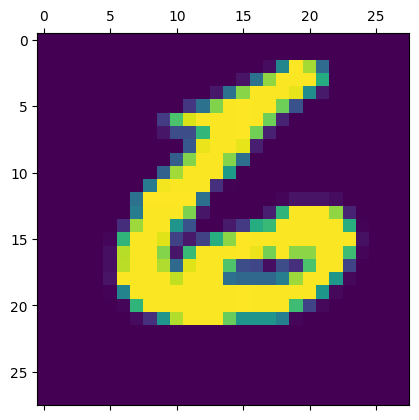

In [ ]:
#Displays the 10,000th test image.
plt.matshow(test_images[9999])

In [ ]:
#Finds the predicted label for the 10,000th test image.
np.argmax(test_images_predicted[9999])

6

In [ ]:
#Converts the predicted probabilities to class labels.
test_images_predicted_labels = [np.argmax(i) for i in test_images_predicted]
test_images_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
##Creates a confusion matrix to compare the true labels with the predicted labels.
cm = tf.math.confusion_matrix(labels=test_labels,predictions=test_images_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1128,    0,    1,    0,    0,    1,    5,    0,    0],
       [   2,    1, 1026,    1,    0,    0,    0,    2,    0,    0],
       [   0,    0,    0, 1007,    0,    3,    0,    0,    0,    0],
       [   0,    0,    0,    0,  978,    0,    2,    0,    1,    1],
       [   1,    0,    0,    3,    0,  885,    1,    1,    0,    1],
       [   3,    3,    0,    0,    1,    3,  947,    0,    1,    0],
       [   0,    2,    1,    1,    0,    0,    0, 1024,    0,    0],
       [   2,    0,    0,    3,    0,    2,    0,    3,  963,    1],
       [   0,    0,    0,    1,    9,    5,    0,    1,    1,  992]],
      dtype=int32)>

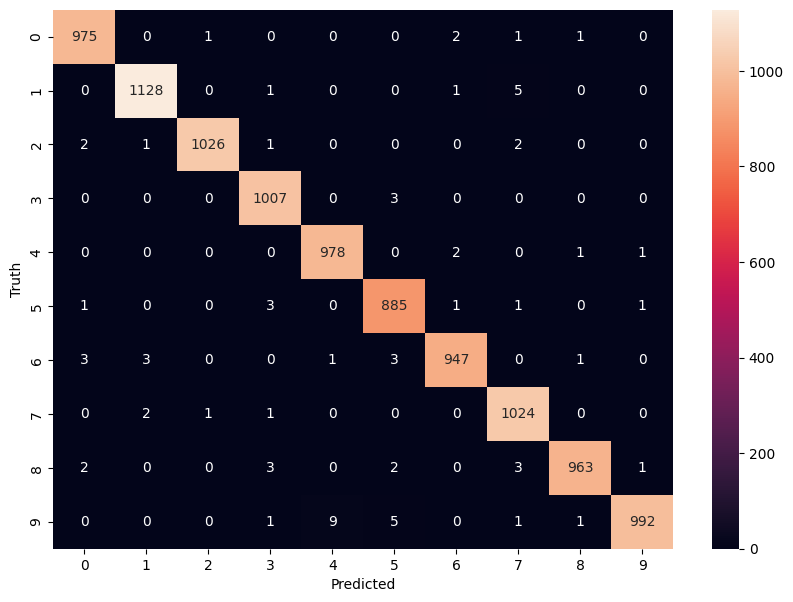

In [ ]:
#Uses Seaborn to visualize the confusion matrix as a heatmap.
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()